<h1 align="center"><font size="8"> Coursera Capstone - Seattle Traffic Accident Study </font></h1>
<h1 align="center"><font size="6"> by Geoffrey Longtin </font></h1>

In [347]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
%matplotlib inline

### Load Data From CSV File  

In [446]:
# Accessing the Data (Downloaded from: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)
df = pd.read_csv('Data-Collisions.csv')
df.head(5)

D:\Program Files (x86)\Anaconda\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [421]:
# Finding dataframe size information
df.shape

(194673, 38)

<div href="pre-processing">
    <h2>1. Pre-processing</h2>
</div>

In [422]:
# Obtaining the list of columns
for col in df.columns: 
    print(col)

SEVERITYCODE
X
Y
OBJECTID
INCKEY
COLDETKEY
REPORTNO
STATUS
ADDRTYPE
INTKEY
LOCATION
EXCEPTRSNCODE
EXCEPTRSNDESC
SEVERITYCODE.1
SEVERITYDESC
COLLISIONTYPE
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INCDATE
INCDTTM
JUNCTIONTYPE
SDOT_COLCODE
SDOT_COLDESC
INATTENTIONIND
UNDERINFL
WEATHER
ROADCOND
LIGHTCOND
PEDROWNOTGRNT
SDOTCOLNUM
SPEEDING
ST_COLCODE
ST_COLDESC
SEGLANEKEY
CROSSWALKKEY
HITPARKEDCAR


In [447]:
# Dropping data that are "Yes" for either INATTENTIONIND, UNDERINFL, SPEEDING variables since these accidents are related to bad driving circustances.
# We start with eliminating dating for SPEEDING
df1 = df.loc[(df['SPEEDING'] == 'Y')]
df1


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
24,2,-122.279658,47.553405,33,1268,1268,3672152,Matched,Intersection,33499.0,...,Dry,Daylight,NaN,NaN,Y,14,From same direction - both going straight - on...,0,0,N
43,2,-122.337348,47.520472,53,56100,56100,2619853,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6256005.0,Y,50,Fixed object,0,0,N
62,1,-122.376182,47.499490,74,32000,32000,1215388,Matched,Block,NaN,...,Dry,Daylight,NaN,4176028.0,Y,32,One parked--one moving,0,0,N
123,1,-122.333924,47.604678,140,29700,29700,1482326,Matched,Block,NaN,...,Wet,Daylight,NaN,4065042.0,Y,14,From same direction - both going straight - on...,0,0,N
124,2,-122.322187,47.618733,141,1135,1135,3605976,Matched,Intersection,29069.0,...,Dry,Daylight,NaN,NaN,Y,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194414,1,-122.293204,47.542648,219238,309651,310931,3815072,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,Y,32,One parked--one moving,0,0,Y
194428,2,-122.320008,47.625350,219255,309595,310875,E881229,Matched,Intersection,28982.0,...,Dry,Dusk,NaN,NaN,Y,0,Vehicle going straight hits pedestrian,0,0,N
194481,2,-122.307643,47.541919,219317,308340,309620,3578649,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,Y,88,All Other Multi Vehicle,0,0,N
194492,1,NaN,NaN,219329,308810,310090,3811388,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,Y,14,From same direction - both going straight - on...,0,0,N


In [448]:
# Putting the index as list
df1_index = df1.index
df1_index

Int64Index([    24,     43,     62,    123,    124,    138,    140,    189,
               193,    237,
            ...
            194309, 194314, 194327, 194342, 194385, 194414, 194428, 194481,
            194492, 194549],
           dtype='int64', length=9333)

In [449]:
# Using the index list to eliminate the rows which are Y for SPEEDING
df_new = df.drop(df1_index, axis=0)
df_new

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


### 1.1 - Dropping data that are "Yes" for either INATTENTIONIND, UNDERINFL, SPEEDING variables since these accidents are related to bad driving circustances

In [450]:
# We continue with eliminating dating for INATTENTIONIND
df2 = df_new.loc[(df['INATTENTIONIND'] == 'Y')]
df2

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
22,1,-122.318169,47.615837,29,80000,80000,2882620,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,8200013.0,NaN,32,One parked--one moving,0,0,N
25,2,-122.312857,47.599218,34,320932,322432,E926429,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
46,1,-122.408105,47.576818,56,1193,1193,3380606,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,N
61,1,-122.333271,47.576651,73,45300,45300,1069729,Matched,Block,NaN,...,Dry,Daylight,NaN,5077020.0,NaN,32,One parked--one moving,0,0,N
67,2,-122.309392,47.593080,79,25300,25300,1795877,Matched,Block,NaN,...,Dry,Daylight,NaN,4274006.0,NaN,14,From same direction - both going straight - on...,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194639,1,-122.344516,47.689474,219506,308716,309996,E873767,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
194647,2,-122.355449,47.704720,219514,308575,309855,E872078,Matched,Block,NaN,...,Wet,Dusk,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
194652,1,-122.335527,47.617434,219520,308698,309978,3812450,Matched,Block,NaN,...,Wet,Dusk,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
194663,2,-122.299160,47.579673,219536,309335,310615,E880807,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [451]:
# Putting the index as list
df2_index = df2.index
df2_index

Int64Index([    22,     25,     46,     61,     67,     69,     78,     93,
                95,    104,
            ...
            194599, 194602, 194623, 194629, 194635, 194639, 194647, 194652,
            194663, 194669],
           dtype='int64', length=29107)

In [452]:
# Using the index list to eliminate the rows which are Y for INATTENTIONIND
df_new = df_new.drop(df2_index, axis=0)
df_new

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194667,1,-122.361672,47.556722,219541,307804,309084,3745813,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,50,Fixed object,0,0,N
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [453]:
# We continue with eliminating dating for UNDERINFL
df3 = df_new.loc[(df['UNDERINFL'] == 'Y')]
df3

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
110,1,-122.289280,47.690198,126,1111,1111,3502001,Matched,Intersection,37950.0,...,Dry,Dusk,NaN,NaN,NaN,32,One parked--one moving,0,0,N
158,2,-122.344721,47.682669,180,1115,1115,3503039,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,N
200,1,-122.374278,47.655362,225,1265,1265,3643906,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,50,Fixed object,0,0,N
227,1,-122.351646,47.617584,259,1151,1151,3598980,Matched,Intersection,29666.0,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
427,1,-122.372761,47.675959,483,1055,1055,3501622,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194633,2,-122.345070,47.731674,219499,310458,311778,3810082,Matched,Block,NaN,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
194648,1,-122.357624,47.635956,219515,307792,309072,3578593,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
194653,2,-122.322097,47.649615,219521,308342,309622,3693206,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
194661,2,-122.306092,47.617881,219532,308532,309812,3814599,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,29,From opposite direction - one left turn - one ...,0,0,N


In [454]:
# Putting the index as list
df3_index = df3.index
df3_index

Int64Index([   110,    158,    200,    227,    427,    438,    442,    459,
               482,    517,
            ...
            194540, 194553, 194577, 194615, 194631, 194633, 194648, 194653,
            194661, 194667],
           dtype='int64', length=3940)

In [455]:
# Using the index list to eliminate the rows which are Y for INATTENTIONIND
df_new = df_new.drop(df3_index, axis=0)
df = df_new            # Since we finished deleting we update df function.
df_new


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194666,2,-122.344569,47.694547,219539,309170,310450,E879712,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [498]:
# Note that the final dataset size is 152293 (which shows that we have succesfully removed all the intended data)

# copy cleaned dataset df_new onto df 
df = df_new                               

### 1.2 - Dropping un-used attributes for this study

In [457]:
# Dropping un-used attributes for this study
df.drop(['X', 'Y', 'INATTENTIONIND', 'UNDERINFL', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDROWNOTGRNT', 'SPEEDING'], axis = 1, inplace = True)
df.head()


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [458]:
# Dropping empty data
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.head(16)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [459]:
# Verifying how much data is left
df.shape

(147067, 4)

### 1.3 - Dropping data which are labelled as 'Other' and 'Unknown'

In [460]:
# Dropping data which are labelled as 'Other' and 'Unknown'
df.replace('Other', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(129116, 4)

In [461]:
# We need to evalute if the target variable is balanced
df['SEVERITYCODE'].value_counts()

1    88259
2    40857
Name: SEVERITYCODE, dtype: int64

In [462]:
# We can see from above the the Majority class is 1. Therefore we will perform a down-sample on this majority class to have the same count as class 2.
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=40857,     # to match minority class which is 40857 as per above count
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()

2    40857
1    40857
Name: SEVERITYCODE, dtype: int64

In [180]:
# From the above data we have a balance dataframe with 50% cases being both severity class 1 and 2.

In [181]:
# We need to create category columns to help support a Logistic Regression Analysis.
# The categorization is performed as follows:
#    For Weather:
#        0: Blowing Sand/Dirt
#        1: Clear
#        2: Fog/Smog/Smoke
#        3: Overcast
#        4: Partly Cloudy
#        5: Raining
#        6: Severe Crosswind
#        7: Sleet/Hail/Freezing Rain
#        8: Snowing
#    For Road Condition:
#        0: Dry
#        1: Ice
#        2: Oil
#        3: Sand/Mud/Dirt
#        4: Snow/Slush
#        5: Standing Water
#        6: Wet
#    For Light Condition:                     (Note: All 'dark' attributes are put into a single group '0')
#        0: Dark - No Street Lights
#        0: Dark - Street Lights Off
#        0: Dark - Street Lights On
#        0: Dark - Unknown Lighting
#        1: Dawn
#        2: Daylight
#        3: Dusk

In [463]:
# Create new duplicated columns for the variables (for later being able to create a numerical category)
df_downsampled['WEATHER_CAT']=df_downsampled['WEATHER']    # Creating Weather Category column with Weather data
df_downsampled['ROADCOND_CAT']=df_downsampled['ROADCOND']    # Creating Road Condition Category column with Roadcond data
df_downsampled['LIGHTCOND_CAT']=df_downsampled['LIGHTCOND']    # Creating Light Condition Category column with LightCond data
df_downsampled.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
193258,1,Raining,Wet,Daylight,Raining,Wet,Daylight
53471,1,Raining,Wet,Daylight,Raining,Wet,Daylight
115753,1,Raining,Dry,Daylight,Raining,Dry,Daylight
170248,1,Clear,Wet,Daylight,Clear,Wet,Daylight
29902,1,Clear,Dry,Dark - Street Lights On,Clear,Dry,Dark - Street Lights On


In [464]:
# Replacing for the 'Weather_Cat' Column
df_downsampled['WEATHER_CAT'].replace(['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing' ], [0,1,2,3,4,5,6,7,8], inplace=True)
df_downsampled.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
193258,1,Raining,Wet,Daylight,5,Wet,Daylight
53471,1,Raining,Wet,Daylight,5,Wet,Daylight
115753,1,Raining,Dry,Daylight,5,Dry,Daylight
170248,1,Clear,Wet,Daylight,1,Wet,Daylight
29902,1,Clear,Dry,Dark - Street Lights On,1,Dry,Dark - Street Lights On


In [465]:
# Replacing for the 'ROADCOND_Cat' Column
df_downsampled['ROADCOND_CAT'].replace(['Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet' ], [0,1,2,3,4,5,6], inplace=True)
df_downsampled.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
193258,1,Raining,Wet,Daylight,5,6,Daylight
53471,1,Raining,Wet,Daylight,5,6,Daylight
115753,1,Raining,Dry,Daylight,5,0,Daylight
170248,1,Clear,Wet,Daylight,1,6,Daylight
29902,1,Clear,Dry,Dark - Street Lights On,1,0,Dark - Street Lights On


In [466]:
# Replacing for the 'LIGHTCOND_CAT' Column
df_downsampled['LIGHTCOND_CAT'].replace(['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk'], [0,0,0,0,1,2,3], inplace=True)
df_downsampled.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
193258,1,Raining,Wet,Daylight,5,6,2
53471,1,Raining,Wet,Daylight,5,6,2
115753,1,Raining,Dry,Daylight,5,0,2
170248,1,Clear,Wet,Daylight,1,6,2
29902,1,Clear,Dry,Dark - Street Lights On,1,0,0


<div href="Modeling">
    <h2>2. Modeling</h2>
</div>

### 2.1 - Define X and y

In [467]:
# Defining X 
X = np.asarray(df_downsampled[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[5, 6, 2],
       [5, 6, 2],
       [5, 0, 2],
       [1, 6, 2],
       [1, 0, 0]], dtype=int64)

In [468]:
y = np.asarray(df_downsampled['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### 2.2 - Normalize the dataset

In [469]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.7736793 ,  1.64326328,  0.56271581],
       [ 1.7736793 ,  1.64326328,  0.56271581],
       [ 1.7736793 , -0.61417997,  0.56271581],
       [-0.67910533,  1.64326328,  0.56271581],
       [-0.67910533, -0.61417997, -1.5947355 ]])

### 2.3 - Train / Test Split

In [471]:
# Splitting the dataset and keeping 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (57199, 3) (57199,)
Test set: (24515, 3) (24515,)


### 2.4 - K-Nearest Neighbor (KNN)

In [472]:
# We first start the modeling by finding the best K value for our KNN Model
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49594126, 0.51042219, 0.5094432 , 0.49814399, 0.49769529,
       0.49643076, 0.49777687, 0.49940853, 0.5070773 ])

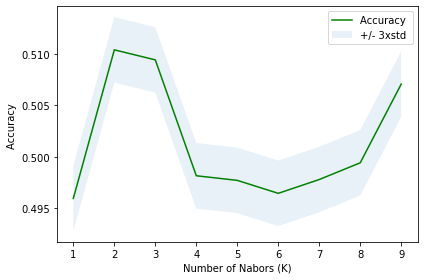

In [473]:
# The we visualize the results to make our decision
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [474]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5104221904956149 with k= 2


In [475]:
# Build the KNN Modle (with K= 2)
# Train
k = 2
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=2)

In [476]:
# Predict
yhat_KNN = neigh.predict(X_test)
yhat_KNN [0:5]

array([1, 2, 2, 2, 2], dtype=int64)

### 2.5 - Decision Tree

In [477]:
# Building the Decision Tree Model
DataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
DataTree
DataTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [478]:
# Predict 
yhat_DT = DataTree.predict(X_test)
print (yhat_DT [0:5])

[2 2 2 2 2]


### 2.6 - Logistic Regression

In [489]:
# Building the Logistic Regression Model
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, solver='liblinear')

In [490]:
# Predict
yhat_LR = LR.predict(X_test)
yhat_LR

array([1, 2, 2, ..., 1, 1, 2], dtype=int64)

In [491]:
# Predic Probability
yhat_LR_prob = LR.predict_proba(X_test)
yhat_LR_prob

array([[0.5032526 , 0.4967474 ],
       [0.49210038, 0.50789962],
       [0.49210038, 0.50789962],
       ...,
       [0.54400229, 0.45599771],
       [0.5253163 , 0.4746837 ],
       [0.49210038, 0.50789962]])

<div href="Model Evaluation">
    <h2>3. Model Evaluation</h2>
</div>

### 3.1 - K-Nearest Neighbor (KNN)

In [497]:
# Jaccard Score
KNN_J = jaccard_score(y_test, yhat_KNN)
print('KNN Jaccard Score is, where K is equal to 2,', KNN_J)

KNN Jaccard Score is, where K is equal to 2, 0.3496260973230736


In [496]:
# F1-Score
KNN_F1 = f1_score(y_test,yhat_KNN, average='macro')
print('KNN F1-Score is, where K is equal to 2,', KNN_F1)

KNN F1-Score is, where K is equal to 2, 0.510297618065648


### 3.2 - Decision Tree

In [484]:
# Jaccard Score
DT_J = jaccard_score(y_test, yhat_DT)
print('Decision Tree Jaccard Score is', DT_J)

Decision Tree Jaccard Score is 0.1912481967438346


In [485]:
# F1-Score
DT_F1 = f1_score(y_test,yhat_DT, average='macro')
print('Decision Tree F1-Score is', DT_F1)

Decision Tree F1-Score is 0.47478590952101996


### 3.3 - Logistic Regression

In [492]:
# Jaccard Score
LR_J = jaccard_score(y_test, yhat_LR)
print('Logistic Regression Jaccard Score is', LR_J)

Logistic Regression Jaccard Score is 0.27585362868681923


In [493]:
# F1-Score
LR_F1 = f1_score(y_test,yhat_LR, average='macro')
print('Logistic Regression F1-Score is', LR_F1)

Logistic Regression F1-Score is 0.506239420103378


In [495]:
# LOGLOSS
LR_log = log_loss(y_test, yhat_LR_prob)
print('Logistic Regression Log Loss is, where C is equal to 0.1,', LR_log)

Logistic Regression Log Loss is, where C is equal to 0.1, 0.6923193427832269
